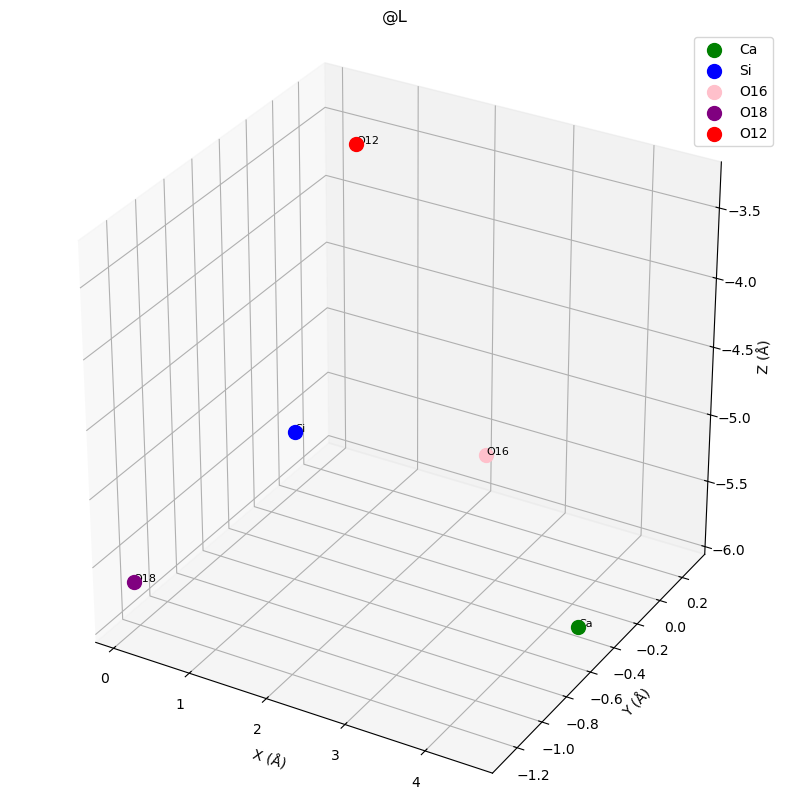

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ファイルからデータを読み取る関数
def read_coordinates(filename):
    elements = []
    coordinates = []
    
    with open(filename, 'r') as f:
        lines = f.readlines()
        for i in range(0, len(lines), 2):
            if i+1 < len(lines):
                element_line = lines[i].strip().split()
                coord_line = lines[i+1].strip().split()
                
                # 酸素原子には番号を付加
                if element_line[0] == 'O':
                    elements.append(f'O{element_line[1]}')
                else:
                    elements.append(element_line[0])
                    
                coordinates.append([float(x) for x in coord_line])
    
    return elements, coordinates

# データの読み取り
Blocks_name = "@L"
elements, coordinates = read_coordinates(Blocks_name)

# 元素ごとの色を定義
element_colors = {
    'Ca': 'green',
    'Si': 'blue'
}
# O原子は異なる色を割り当て
oxygen_colors = ['red', 'orange', 'pink', 'purple']

# 可視化
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 元素ごとにプロット
for i, (element, coord) in enumerate(zip(elements, coordinates)):
    if element.startswith('O'):
        color = oxygen_colors[i % len(oxygen_colors)]
    else:
        color = element_colors.get(element, 'gray')
        
    ax.scatter(coord[0], coord[1], coord[2], 
              c=color, 
              label=element,
              s=100)
    ax.text(coord[0], coord[1], coord[2], 
            element, 
            color='black', 
            fontsize=8)

# グラフの設定
ax.set_xlabel('X (Å)')
ax.set_ylabel('Y (Å)')
ax.set_zlabel('Z (Å)')
ax.set_title(Blocks_name)
ax.legend()

# アスペクト比を1:1:1に
ax.set_box_aspect([1,1,1])

plt.show()